In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Melbourne_housing_FULL.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [3]:
df['SellerG'].nunique()

388

In [4]:
df['SellerG'].value_counts()

SellerG
Jellis             3359
Nelson             3236
Barry              3235
hockingstuart      2623
Marshall           2027
                   ... 
Clairmont             1
Buxton/Find           1
Harcourts/Barry       1
Silver                1
Methven               1
Name: count, Length: 388, dtype: int64

In [5]:
df.size

731997

In [6]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [7]:
df.shape

(34857, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [9]:
cols_to_use=['Suburb', 'Rooms', 'Type','Method', 'SellerG','Distance', 'Bedroom2', 'Bathroom', 
             'Car','Landsize', 'BuildingArea', 'Regionname', 'Propertycount','Price']

dataset=df[cols_to_use]

## Missing Values
* For specific columns ('Distance', 'Bedroom2', 'Bathroom', 'Car', 'Propertycount'), missing values are filled with zeroes.* 
For the 'Landsize' and 'BuildingArea' columns, missing values arereplaced  with the mean.

In [10]:
dataset.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Regionname           3
Propertycount        3
Price             7610
dtype: int64

In [11]:
import warnings
warnings.filterwarnings('ignore')

cols_to_fill_zero=[ 'Distance','Bedroom2', 'Bathroom', 'Car', 'Propertycount']
dataset[cols_to_fill_zero]= dataset[cols_to_fill_zero].fillna(0)

dataset['Landsize']=dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea']=dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

In [12]:
dataset.dropna(inplace=True)

In [13]:
dataset.shape

(27244, 14)

In [14]:
dataset.isnull().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Regionname       0
Propertycount    0
Price            0
dtype: int64

## Outliers Handling
1. i have choose one column
2. then i have found lower and upper outliers
   
        * lower_outliers=Q1-1.5*(IQR)
        * upper_outlier = Q3+1.5*(IQR)
4. with the help of box plox i have checked whether the outliers has been removed or not
5. with the help of IQR Method i have removed outliers of all the columns
   
         * IQR=Q3-Q1

In [15]:
from scipy import stats

Q1=df['Rooms'].quantile(q=0.25)
Q3=df['Rooms'].quantile(q=0.75)
IQR=Q3-Q1
    
print('1st quartile = {} \n3rd quartile range = {} \ninter quartile range ={}'.format(Q1,Q3,stats.iqr(df['Rooms'])))

1st quartile = 2.0 
3rd quartile range = 4.0 
inter quartile range =2.0


In [16]:
lower_outlier = Q1-1.5*(IQR)
upper_outlier = Q3+1.5*(IQR)

print('lower outlier = ', lower_outlier)
print('upper outlier = ', upper_outlier)

lower outlier =  -1.0
upper outlier =  7.0


In [17]:
print('Number of upper outlier = ', 
      dataset[dataset['Rooms']>upper_outlier]['Rooms'].count())
print('Number of lower outlier = ', 
      dataset[dataset['Rooms']<lower_outlier]['Rooms'].count())

Number of upper outlier =  23
Number of lower outlier =  0


In [18]:
dataset.loc[(dataset['Rooms']<lower_outlier) | (dataset['Rooms']>upper_outlier),
['Rooms']] = dataset['Rooms'].median()

In [19]:
print('Number of upper outlier = ',dataset[dataset['Rooms']>upper_outlier]['Rooms'].count())
print('Number of lower outlier = ',dataset[dataset['Rooms']<lower_outlier]['Rooms'].count())

Number of upper outlier =  0
Number of lower outlier =  0


<Axes: xlabel='Rooms'>

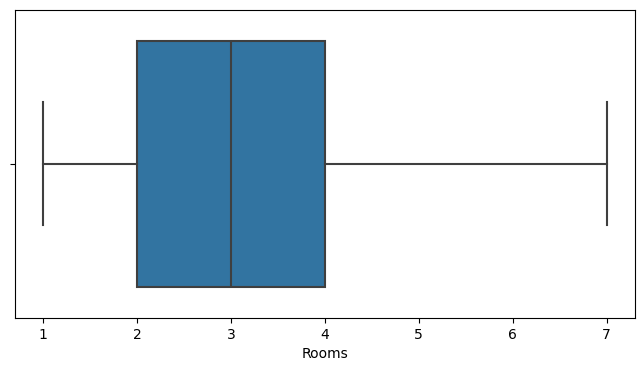

In [20]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.boxplot(x='Rooms', data=dataset,)

In [21]:
for cols in dataset.columns[:-1]:
    if dataset[cols].dtype==object:
        continue
    else:
        Q1=dataset[cols].quantile(q=0.25)
        Q3=dataset[cols].quantile(q=0.75)
        IQR=Q3-Q1
    
        low=Q1-1.5*(IQR)
        high=Q3+1.5*(IQR)
        dataset.loc[(dataset[cols]<low)|(dataset[cols]>high),cols] = dataset[cols].median()

<Axes: xlabel='BuildingArea'>

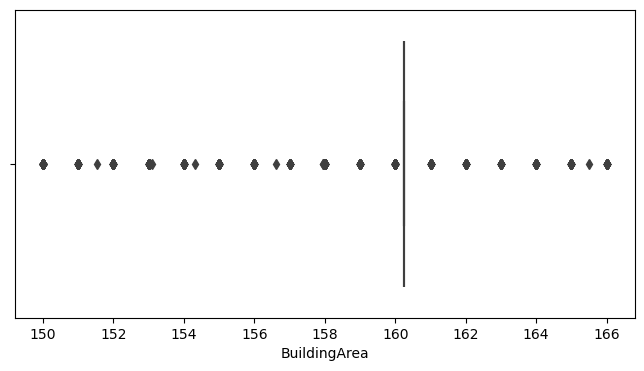

In [22]:
plt.figure(figsize =(8,4))
sns.boxplot(x='BuildingArea', data= dataset, orient='h')

In [23]:
numeric_cols=['Rooms','Propertycount','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea',	'Price']
dataset[numeric_cols].corr()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
Rooms,1.000000,-0.069484,0.311482,0.554088,0.411772,0.348026,0.362793,-0.039481,0.464536
Propertycount,-0.069484,1.000000,-0.078625,-0.028384,-0.013974,-0.027420,-0.046722,0.007199,-0.010364
Distance,0.311482,-0.078625,1.000000,0.156576,0.100343,0.191976,0.344302,-0.025469,-0.167219
Bedroom2,0.554088,-0.028384,0.156576,1.000000,0.838180,0.717833,0.021490,-0.065623,0.299756
Bathroom,0.411772,-0.013974,0.100343,0.838180,1.000000,0.645191,-0.080908,-0.066235,0.275152
Car,0.348026,-0.027420,0.191976,0.717833,0.645191,1.000000,0.099695,-0.048828,0.202983
Landsize,0.362793,-0.046722,0.344302,0.021490,-0.080908,0.099695,1.000000,-0.004623,0.182581
BuildingArea,-0.039481,0.007199,-0.025469,-0.065623,-0.066235,-0.048828,-0.004623,1.000000,0.001780
Price,0.464536,-0.010364,-0.167219,0.299756,0.275152,0.202983,0.182581,0.001780,1.000000


In [24]:
print(dataset.shape)
dataset1_num_col = dataset.drop(['Suburb','Type', 'Method', 'SellerG','Car',
                                 'Regionname','Price'],axis=1)
print(dataset1_num_col.shape)
dataset1_num_col.head()

(27244, 14)
(27244, 7)


,Rooms,Distance,Bedroom2,Bathroom,Landsize,BuildingArea,Propertycount
1,2,2.5,2.0,1.0,202.0,160.2564,4019.0
2,2,2.5,2.0,1.0,156.0,160.2564,4019.0
4,3,2.5,3.0,2.0,134.0,150.0000,4019.0
5,3,2.5,3.0,2.0,94.0,160.2564,4019.0
6,4,2.5,3.0,1.0,120.0,160.2564,4019.0


In [25]:
dataset_cat = pd.get_dummies(dataset, drop_first=True)
print(dataset_cat.shape)

(27244, 713)


In [26]:
dataset=pd.concat([dataset1_num_col,dataset_cat],axis=1)
dataset.shape

(27244, 720)

## Data Standardization

In [50]:
X= dataset.drop('Price',axis=1)
y= dataset['Price']
print(X.shape)
print(y.shape)

(27244, 719)
(27244,)


In [51]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled=scaler.fit_transform(X)

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=40)

In [53]:
x_train.shape

(21795, 719)

In [54]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression().fit(x_train,y_train)
Reg_predict_test=LR.predict(x_test)
Reg_predict_train=LR.predict(x_train)

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, Reg_predict_test)
y_test_pred = r2_score(y_test, Reg_predict_test)
y_train_pred = r2_score(y_train, Reg_predict_train)

In [56]:
print(y_test_pred)
print(y_train_pred)

-3.5791194449467785e+26
0.6776533150073811


### Using Lasso(L1 reguilarized) Regression Model

In [61]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(x_train, y_train)
y_predict_lasso_train =lasso_reg.predict(x_train)
y_predict_lasso_test =lasso_reg.predict(x_test)

In [67]:
lasso_reg.score(x_test,y_test)

0.6673541511516021

In [68]:
lasso_reg.score(x_train,y_train)

0.6790460713822487

### Using Ridge(L2 reguilarized) Regression Model

In [69]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(x_train, y_train)
y_predict_ridge_train = ridge_reg.predict(x_train)
y_predict_ridge_test = ridge_reg.predict(x_test)

In [70]:
ridge_reg.score(x_test,y_test)

0.6672838035792916

In [71]:
ridge_reg.score(x_train,y_train)

0.6790522449677989

### Using elastic(reguilarized) Regression Model

In [72]:
from sklearn.linear_model import ElasticNet
en_reg = ElasticNet()
en_reg.fit(x_train, y_train)
y_predict_en_train = en_reg.predict(x_train)
y_predict_en_test = en_reg.predict(x_test)

In [74]:
print(en_reg.score(x_test,y_test))
print(en_reg.score(x_train,y_train))

0.6279826924416306
0.6413105006524575


### Simple Regression Analysis

In [34]:
dataset.shape

(27244, 720)

In [35]:
x = dataset['Rooms'].iloc[:,:1]

In [36]:
y = dataset['Price']

In [37]:
x.shape

(27244, 1)

In [38]:
scaled=scaler.fit_transform(x)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=40)

In [40]:
from sklearn.linear_model import LinearRegression
SLR=LinearRegression().fit(x_train,y_train)
SLR_predict_test=SLR.predict(x_test)
SLR_predict_train=SLR.predict(x_train)

LR.fit(x_train,y_train)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, Reg_predict_test)
y_test_pred_SRL = r2_score(y_test, SLR_predict_test)
y_train_pred_SLR = r2_score(y_train, SLR_predict_train)

In [42]:
print(y_test_pred_SRL)
print(y_train_pred_SLR)

0.20903108291078887
0.21747225615327836
